In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('california_housing_train.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [3]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [4]:
numerical = data.select_dtypes(['int64','float64'])
numerical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [5]:
categorical = data.select_dtypes(['object','category'])
categorical.head(5)

""
0
1
2
3
4


In [6]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

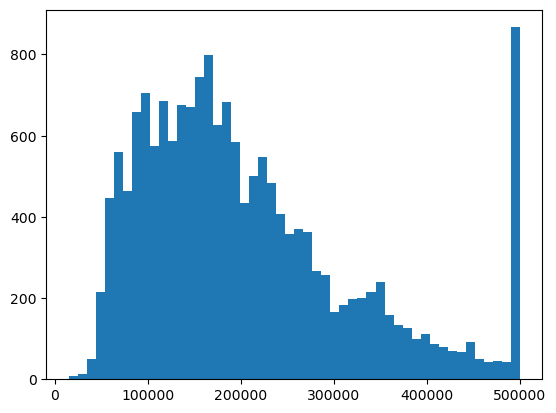

In [7]:
plt.hist(data['median_house_value'], bins = 50)
plt.show()

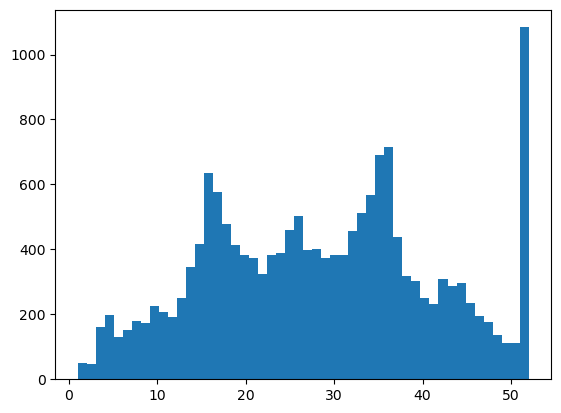

In [8]:
plt.hist(data['housing_median_age'], bins = 50)
plt.show()

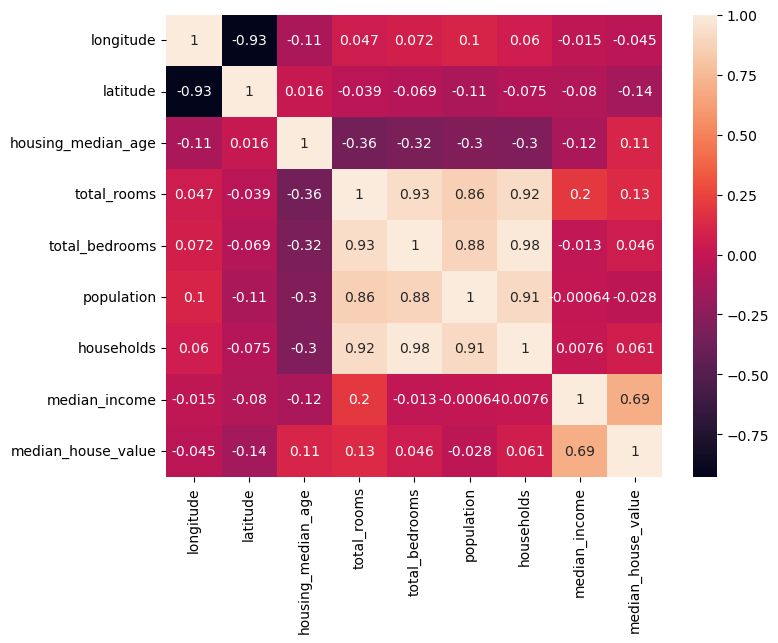

In [9]:
correlation_matrix = data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot= True)
plt.show()

In [10]:
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [11]:
data['room_per_household'] = data['total_rooms']/data['households']

In [12]:
data.drop(columns='total_rooms', inplace=True)

In [13]:
correlation_matrix_2 = data.corr()

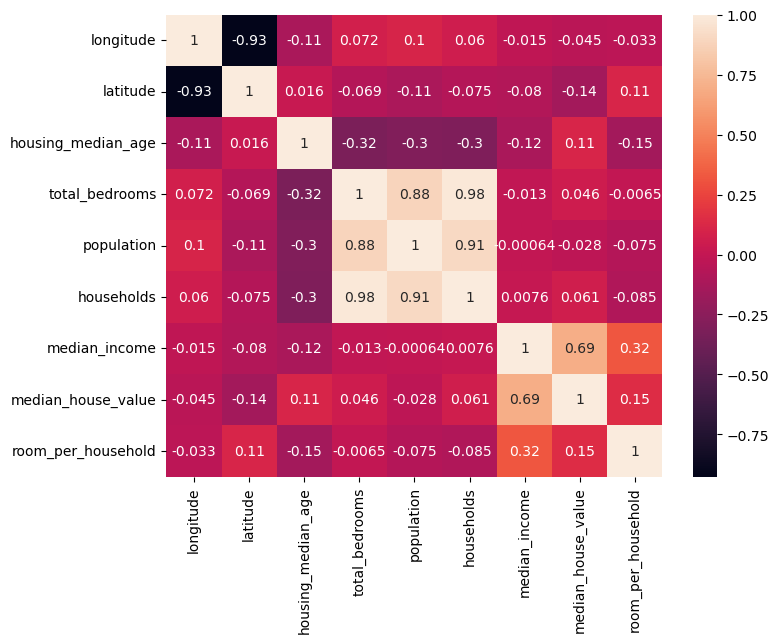

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_2, annot=True)
plt.show()

In [15]:
correlation_matrix_2

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value,room_per_household
longitude,1.000000,-0.925208,-0.114250,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.032894
latitude,-0.925208,1.000000,0.016454,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,0.110017
housing_median_age,-0.114250,0.016454,1.000000,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.146234
total_bedrooms,0.071802,-0.069373,-0.320434,1.000000,0.881169,0.980920,-0.013495,0.045783,-0.006480
population,0.101674,-0.111261,-0.295890,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.074806
households,0.059628,-0.074902,-0.302754,0.980920,0.909247,1.000000,0.007644,0.061031,-0.084505
median_income,-0.015485,-0.080303,-0.115932,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.317311
median_house_value,-0.044982,-0.144917,0.106758,0.045783,-0.027850,0.061031,0.691871,1.000000,0.150081
room_per_household,-0.032894,0.110017,-0.146234,-0.006480,-0.074806,-0.084505,0.317311,0.150081,1.000000


In [16]:
data.drop(columns=['latitude','longitude'], inplace=True)

In [17]:
data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']
data.drop(columns='total_bedrooms')

,housing_median_age,population,households,median_income,median_house_value,room_per_household,bedrooms_per_household
0,15.0,1015.0,472.0,1.4936,66900.0,11.889831,2.718220
1,19.0,1129.0,463.0,1.8200,80100.0,16.522678,4.105832
2,17.0,333.0,117.0,1.6509,85700.0,6.153846,1.487179
3,14.0,515.0,226.0,3.1917,73400.0,6.641593,1.491150
4,20.0,624.0,262.0,1.9250,65500.0,5.549618,1.244275
...,...,...,...,...,...,...,...
16995,52.0,907.0,369.0,2.3571,111400.0,6.008130,1.067751
16996,36.0,1194.0,465.0,2.5179,79000.0,5.051613,1.135484
16997,17.0,1244.0,456.0,3.0313,103600.0,5.870614,1.164474
16998,19.0,1298.0,478.0,1.9797,85800.0,5.589958,1.154812


In [18]:
data

,housing_median_age,total_bedrooms,population,households,median_income,median_house_value,room_per_household,bedrooms_per_household
0,15.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,2.718220
1,19.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,4.105832
2,17.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,1.487179
3,14.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,1.491150
4,20.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,1.244275
...,...,...,...,...,...,...,...,...
16995,52.0,394.0,907.0,369.0,2.3571,111400.0,6.008130,1.067751
16996,36.0,528.0,1194.0,465.0,2.5179,79000.0,5.051613,1.135484
16997,17.0,531.0,1244.0,456.0,3.0313,103600.0,5.870614,1.164474
16998,19.0,552.0,1298.0,478.0,1.9797,85800.0,5.589958,1.154812


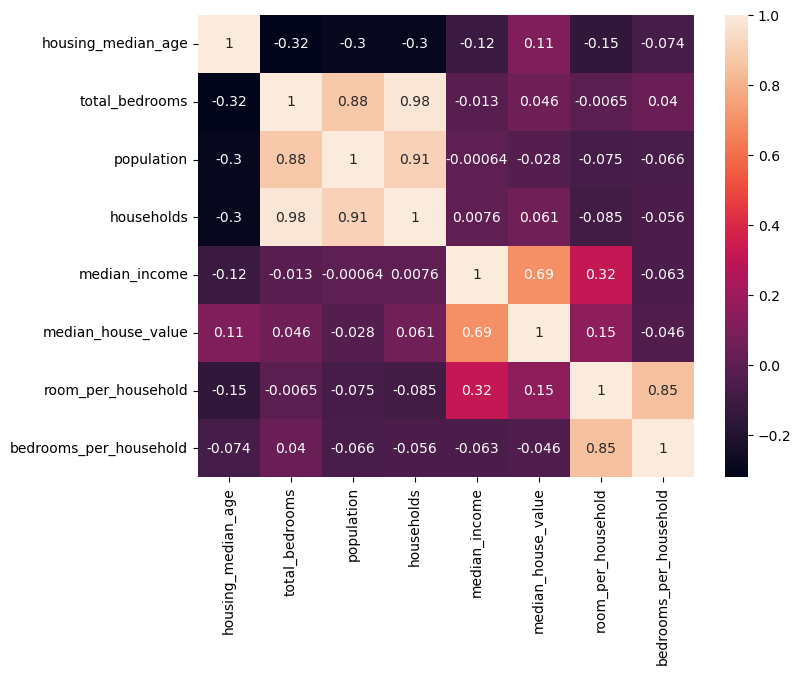

In [19]:
correlation_matrix_3 = data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_3, annot = True)
plt.show()

In [20]:
data.drop(columns=['households', 'room_per_household'], inplace=True)

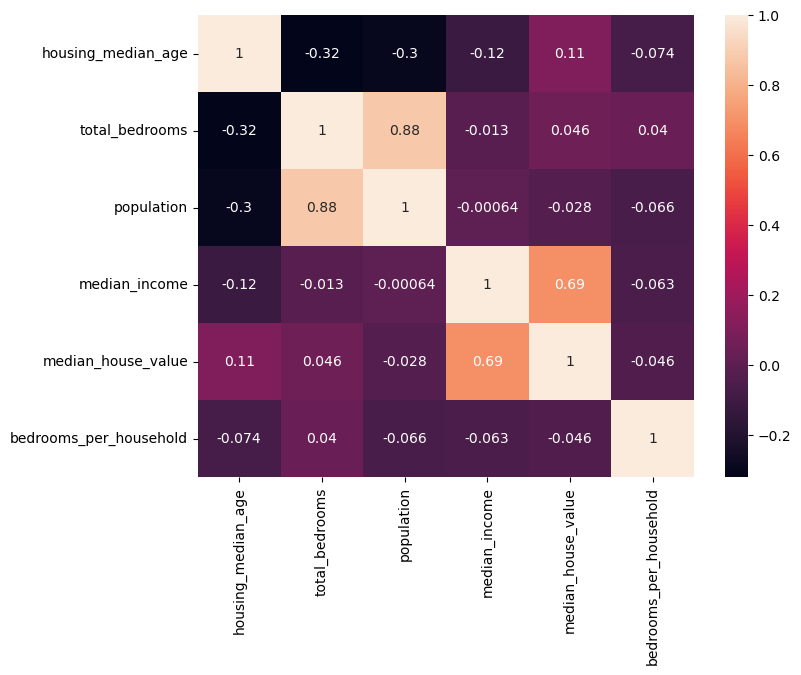

In [21]:
final_correlation_matrix = data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(final_correlation_matrix, annot=True)
plt.show()

In [22]:
data

,housing_median_age,total_bedrooms,population,median_income,median_house_value,bedrooms_per_household
0,15.0,1283.0,1015.0,1.4936,66900.0,2.718220
1,19.0,1901.0,1129.0,1.8200,80100.0,4.105832
2,17.0,174.0,333.0,1.6509,85700.0,1.487179
3,14.0,337.0,515.0,3.1917,73400.0,1.491150
4,20.0,326.0,624.0,1.9250,65500.0,1.244275
...,...,...,...,...,...,...
16995,52.0,394.0,907.0,2.3571,111400.0,1.067751
16996,36.0,528.0,1194.0,2.5179,79000.0,1.135484
16997,17.0,531.0,1244.0,3.0313,103600.0,1.164474
16998,19.0,552.0,1298.0,1.9797,85800.0,1.154812


In [23]:
data.columns

Index(['housing_median_age', 'total_bedrooms', 'population', 'median_income',
       'median_house_value', 'bedrooms_per_household'],
      dtype='object')

In [24]:
pipeline1 = Pipeline([
    ('scaling', RobustScaler()),
    ('model', LogisticRegression())
])

In [25]:
'''' X = data[['housing_median_age', 'total_bedrooms', 'population', 'median_income', 'bedrooms_per_household']]
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
pipeline1.fit(X_train, y_train)
print("Test accuracy:", pipeline1.score(X_test, y_test))''''

SyntaxError: EOL while scanning string literal (3149312276.py, line 5)

In [29]:
from sklearn.linear_model import LinearRegression
pipeline2 = Pipeline([
    ('scaling', RobustScaler()),
    ('model', LinearRegression())
])

In [30]:

X = data[['housing_median_age', 'total_bedrooms', 'population', 'median_income', 'bedrooms_per_household']]
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
pipeline2.fit(X_train, y_train)
print("Test accuracy:", pipeline2.score(X_test, y_test))

Test accuracy: 0.5837779185394849
